# **Lending Club Case Study** 

## Author:
-Dipak Sah

-Indraja



# ** Problem Statement**

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

# ** Business Objective**

- Understanding of the driving factors behind loan defaults to minimize credit loss
- Having Knowledge of indicators which can used for approval of loans 

In [339]:
# Importing needed libraries for EDA of this case study
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [340]:
# Reading loan file to data frame
loan = pd.read_csv('loan.csv')

In [341]:
# Reading the loan data dictionary file 
loan_data_dict = pd.read_excel('Data_Dictionary.xlsx')

# Analysing Data in the loan data frame 

In [342]:
loan.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [343]:
# Finding all the columns which has null values 
loan.isna().sum()[loan.isna().sum() > 0]

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

In [344]:
loan.shape

(39717, 111)

#### There are total 111 columns . But there are many columns with no values which are useless for our analysis.



In [345]:
# Removing all the columns which has no values or only having null values 
loan.dropna(axis=1,how = 'all',inplace=True)

In [346]:
loan.shape

(39717, 57)

In [347]:
# We see that after cleaning null columns we are left with only 57 columns now.
# There is also probabilty that we might of rows having only null values , we shall also clean them 
loan.dropna(axis=0,how = 'all',inplace=True)

In [348]:
loan.shape

(39717, 57)

In [349]:
# It looks like there are no rows with only null value as the count is still same ie 39717

In [350]:
# Lets check for duplicates , if any then we have to drop them as well.
loan.drop_duplicates(inplace=True)

In [351]:
loan.shape

(39717, 57)

In [352]:
# It looks like there are no duplicate records as the count is same ie 39717

In [353]:
# Checking how many columns are still there will null values in percentage 
loan.isna().sum()[loan.isna().sum() > 0]/loan.shape[0]*100

emp_title                      6.191303
emp_length                     2.706650
desc                          32.585543
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

In [354]:
# we can see that there are 3 columns with more than 50% values as null and 'desc' columns has close to 335 nulls, 
# these columns are not useful for our analysis 
# so dropping mths_since_last_delinq,mths_since_last_record ,next_pymnt_d, desc .  

In [355]:
colums_with_too_many_nulls = ['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d']
loan.drop(colums_with_too_many_nulls,axis=1,inplace=True)

In [356]:
loan.shape

(39717, 53)

In [357]:
# So Now we have 53 columns for analysis 
# Again checking null values count in percentage
loan.isna().sum()[loan.isna().sum() > 0]/loan.shape[0]*100

emp_title                     6.191303
emp_length                    2.706650
title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
dtype: float64

In [358]:
# Analysising to find out columns with single value or having only unique value 
loan.nunique().reset_index(name='count').sort_values(by='count')

,index,count
52,tax_liens,1
50,delinq_amnt,1
49,chargeoff_within_12_mths,1
48,acc_now_delinq,1
47,application_type,1
46,policy_code,1
45,collections_12_mths_ex_med,1
32,initial_list_status,1
17,pymnt_plan,1
5,term,2


In [359]:
# From above table we find that there are 9 columns with single data and 3 columns with unique data
# these 3 unique data columns - url , member_id and id will be not useful for our analysis 
# we can drop them 9 + 3 columns as they will be useless for our analysis

In [360]:
single_data_columns = list(loan.columns[loan.nunique()== 1])
loan.drop(single_data_columns,axis=1,inplace=True)

In [361]:
loan.shape

(39717, 44)

In [362]:
# 9 more columns dropped 

In [363]:
unique_data_columns = list(loan.columns[loan.nunique()==loan.shape[0]])
loan.drop(unique_data_columns,axis=1,inplace=True)

In [364]:
loan.shape

(39717, 41)

In [365]:
# 3 more columns dropped , now we have 41 columns let us check the info and null values again 

In [366]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [367]:
loan.isna().sum()[loan.isna().sum() > 0]/loan.shape[0]*100

emp_title               6.191303
emp_length              2.706650
title                   0.027696
revol_util              0.125891
last_pymnt_d            0.178765
last_credit_pull_d      0.005036
pub_rec_bankruptcies    1.754916
dtype: float64

In [368]:
# reading data dictionary data frame
loan_data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [369]:
# checking if there is any column in the loan file which does not have matching data in data dictionary
set(loan.columns) - set(loan_data_dict['LoanStatNew'])

set()

In [370]:
# verifying description for all the 41 columns

In [371]:
loan_data_dict[loan_data_dict['LoanStatNew'].isin(list(loan.columns.values))]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan...
4,annual_inc,The self-reported annual income provided by th...
11,collection_recovery_fee,post charge off collection fee
13,delinq_2yrs,The number of 30+ days past-due incidences of ...
16,dti,A ratio calculated using the borrower’s total ...
18,earliest_cr_line,The month the borrower's earliest reported cre...
19,emp_length,Employment length in years. Possible values ar...
20,emp_title,The job title supplied by the Borrower when ap...
23,funded_amnt,The total amount committed to that loan at tha...
24,funded_amnt_inv,The total amount committed by investors for th...


# Observation from above descriptions of the columns

## We find the below listed columns are either personal identifier infomrmation or will be derived only after loan is approved . But our analysis is to find the indicators which can show if the applicant is likely to default or not. 

* **addr_state**-	The state provided by the borrower in the loan application
* **collection_recovery_fee**-	post charge off collection fee
* **delinq_2yrs**-	No of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
* **earliest_cr_line**-	The month the borrower's earliest reported credit line was opened
* **emp_title**-		The job title supplied by the Borrower when applying for the loan.*
* **last_credit_pull_d**-		The most recent month LC pulled credit for this loan
* **last_pymnt_amnt**-		Last total payment amount received
* **last_pymnt_d**-		Last month payment was received
* **out_prncp**-		Remaining outstanding principal for total amount funded
* **out_prncp_inv**-		Remaining outstanding principal for portion of total amount funded by investors
* **recoveries**-		post charge off gross recovery
* **revol_bal**-		Total credit revolving balance
* **title**-		The loan title provided by the borrower
* **total_pymnt**-	Payments received to date for total amount funded
* **total_pymnt_inv**-	Payments received to date for portion of total amount funded by investors
* **total_rec_int**-		Interest received to date
* **total_rec_late_fee**-		Late fees received to date
* **total_rec_prncp**-		Principal received to date
* **zip_code**-		The first 3 numbers of the zip code provided by the borrower in the loan application.

### So we can drop all the columns mentioned above


In [372]:
unwanted_columns = ['addr_state','collection_recovery_fee','delinq_2yrs','earliest_cr_line','emp_title','last_credit_pull_d',
                    'last_pymnt_amnt','last_pymnt_d','out_prncp','out_prncp_inv','recoveries','revol_bal','title',
                    'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp',
                    'zip_code']

In [373]:
loan.drop(unwanted_columns,axis=1,inplace=True)

In [374]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  dti                

In [375]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,3,0,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,3,0,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,2,0,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,10,0,21%,37,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,15,0,53.90%,38,0.0


## Data cleansing 

### We noticed that int_rate & revol_util are having percent symbol and are object type. Let us remove % and make then numeric

In [376]:
loan['int_rate']   = loan['int_rate'].str.rstrip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float')

In [377]:
loan.info()
loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  dti                

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,3,0,83.7,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,3,0,9.4,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,2,0,98.5,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,10,0,21.0,37,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,15,0,53.9,38,0.0


In [378]:
# missing value counts 
loan.isna().sum()[loan.isna().sum() > 0]

emp_length              1075
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

## Missing value treament

### There are 3 columns  as shown above which have some missing values 

In [379]:
loan[['emp_length','revol_util','pub_rec_bankruptcies']].dtypes

emp_length               object
revol_util              float64
pub_rec_bankruptcies    float64
dtype: object

In [380]:
loan[['emp_length','revol_util','pub_rec_bankruptcies']].nunique()

emp_length                11
revol_util              1089
pub_rec_bankruptcies       3
dtype: int64

In [381]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [382]:
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

### we notice below things from above analysis of these 3 columns
* emp_length is categorical column, so missing value can be replaced with mode.
* though pub_rec_bankruptcies is float value but it has only 3 unique values so here also missing value can be replaced with mode
* revol_util is numrical value and has 1089 unique value so missing values can be replaced with median


In [383]:
loan['emp_length'] = loan['emp_length'].fillna(loan['emp_length'].mode()[0])

In [384]:
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].mode()[0])

In [385]:
loan['revol_util'] = loan['revol_util'].fillna(round(loan['revol_util'].median(),2))

In [386]:
# checking missing value counts 
loan.isna().sum()[loan.isna().sum() > 0]

Series([], dtype: int64)

In [387]:
# Now loan dataframe has no missing values as seen above

## Let us analyse issue_d column

In [388]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [389]:
# Let us convert into yyyy-mm-dd format
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')

In [390]:
loan['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

## Let us derive year and month as 2 new columns from issue_d for our analysis


In [391]:
loan['issue_year'] = loan['issue_d'].dt.year

In [392]:
loan['issue_month'] = loan['issue_d'].dt.month

In [393]:
# just to check data if it is properly derived or not 
loan[['issue_d', 'issue_year', 'issue_month']].tail()

,issue_d,issue_year,issue_month
39712,2007-07-01,2007,7
39713,2007-07-01,2007,7
39714,2007-07-01,2007,7
39715,2007-07-01,2007,7
39716,2007-06-01,2007,6


In [394]:
# checking Loan data 
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,1,3,0,83.7,9,0.0,2011,12
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,5,3,0,9.4,4,0.0,2011,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2,2,0,98.5,10,0.0,2011,12
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,1,10,0,21.0,37,0.0,2011,12
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,17.94,0,15,0,53.9,38,0.0,2011,12


In [395]:
# Let us check columns who has no of unique value across less than 5
loan.nunique().reset_index(name='count').sort_values(by='count')

,index,count
3,term,2
11,verification_status,3
21,pub_rec_bankruptcies,3
13,loan_status,3
18,pub_rec,5
22,issue_year,5
9,home_ownership,5
6,grade,7
16,inq_last_6mths,9
8,emp_length,11


In [396]:
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [397]:
#  2 values for term looks good let us move with next

In [398]:
loan['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [399]:
# here we notice that Verified and Source Verified can be merged to one value say 'Verified'
loan['verification_status'] = loan['verification_status'].apply(lambda x:'Verified' if x == 'Source Verified' else x)

In [400]:
# now we have only 2 values 
loan['verification_status'].unique()

array(['Verified', 'Not Verified'], dtype=object)

In [401]:
loan['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

In [402]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [403]:
loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [404]:
# In our anaysis , we do not need records with current loan status so dropping them
loan = loan[loan['loan_status'] != 'Current'] 

In [405]:
# it matches to sum of charged off and fully paid
loan.shape

(38577, 24)

In [406]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            38577 non-null  object        
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

### **Let us group these variables/columns for analysis**
1. **Numeric Data** 
2. **Ordered Categorical Data** 
3. **Unordered Categorical Data** 

In [407]:
numeric_cols1 = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti']

numeric_cols2 = ['inq_last_6mths','open_acc','pub_rec','revol_util','total_acc','pub_rec_bankruptcies']

ordered_categorical_cols = ['term','grade','sub_grade','emp_length','issue_year','issue_month']

unordered_categorical_cols = ['home_ownership','purpose','verification_status','loan_status']

# Univariate Analysis

## Data distribution plots

In [408]:
def box_plot(cols):
    plt.figure(figsize=(3,3))
    sns.boxplot(loan[str(cols)])
# Adding and formatting title
    plt.title('Distribution of ' + str(cols), fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
# Labeling Axes
    plt.ylabel(str(cols), fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.show()

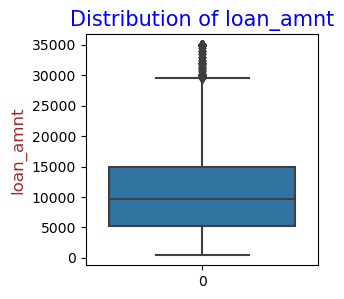

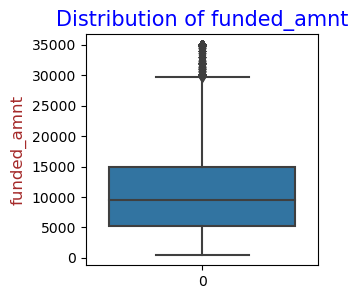

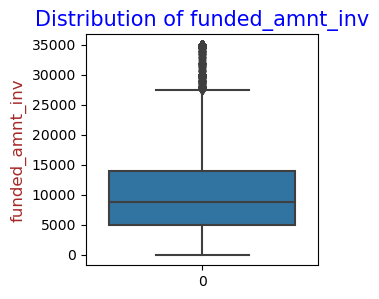

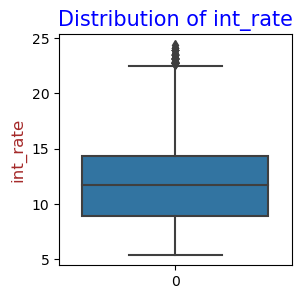

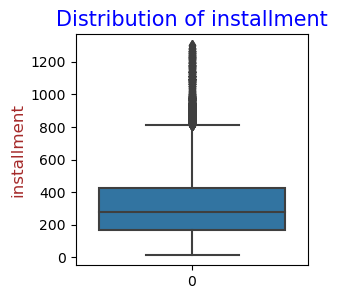

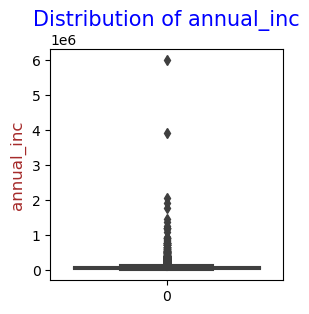

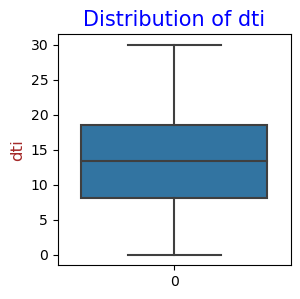

In [409]:
# plotting box plot for all numeric variable
for cols in numeric_cols1:
    box_plot(cols)

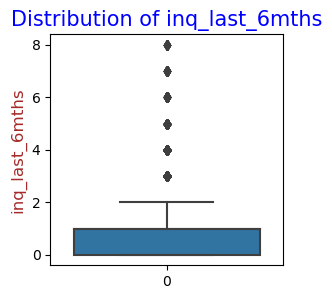

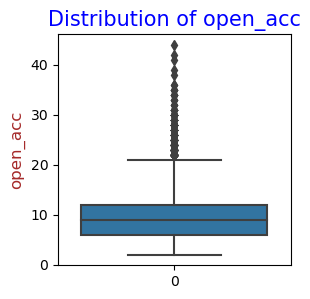

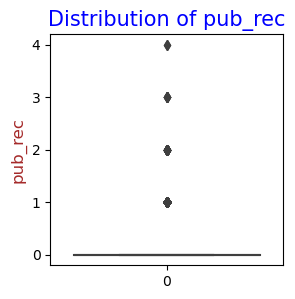

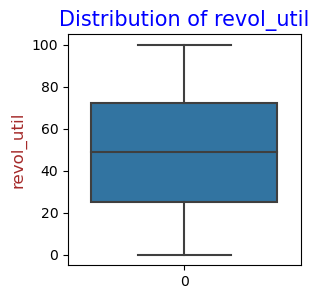

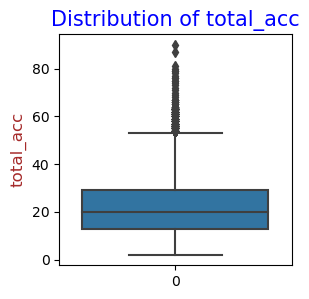

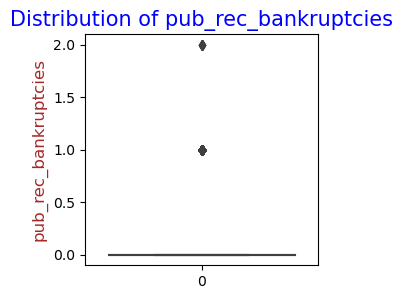

In [410]:
for cols in numeric_cols2:
    box_plot(cols)

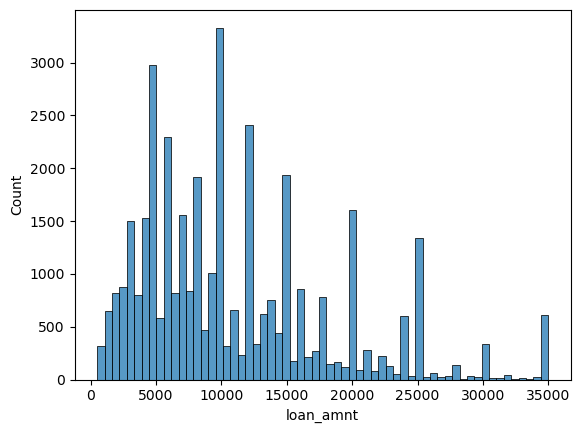

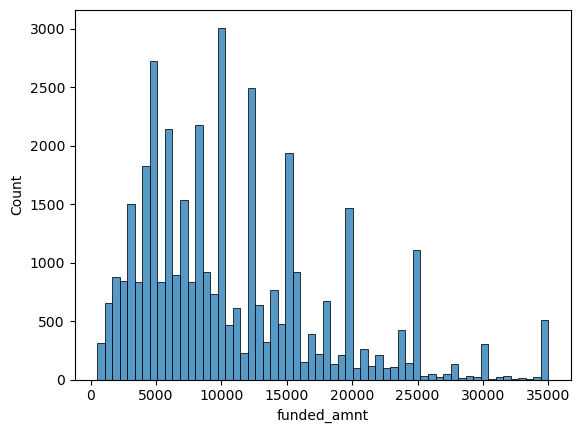

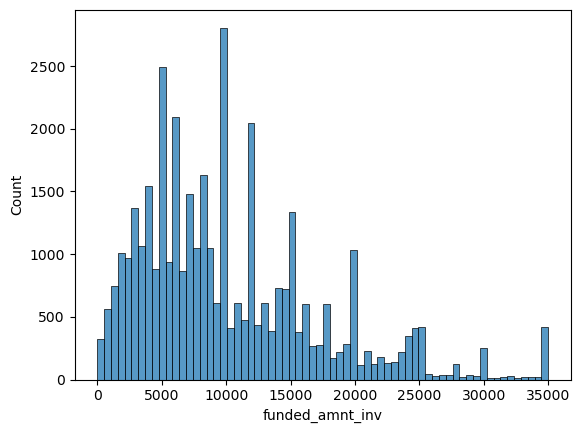

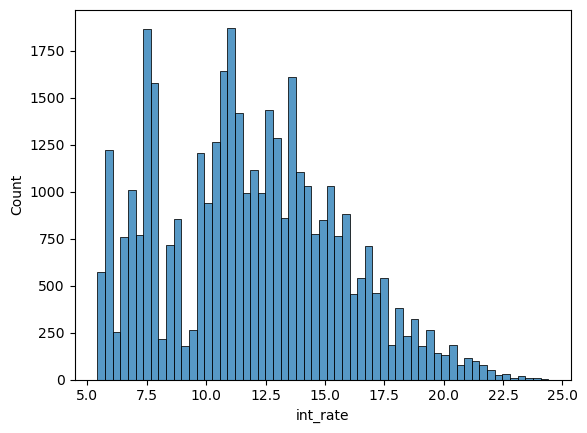

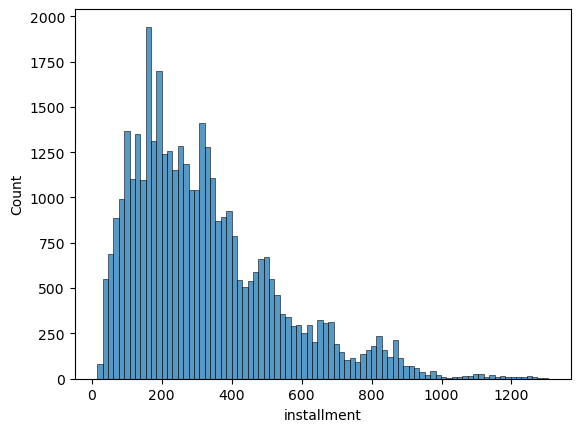

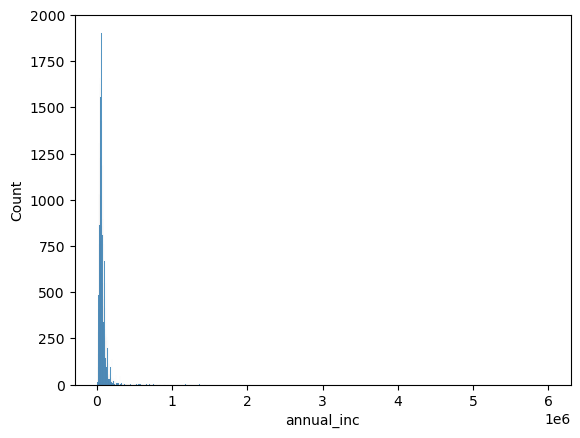

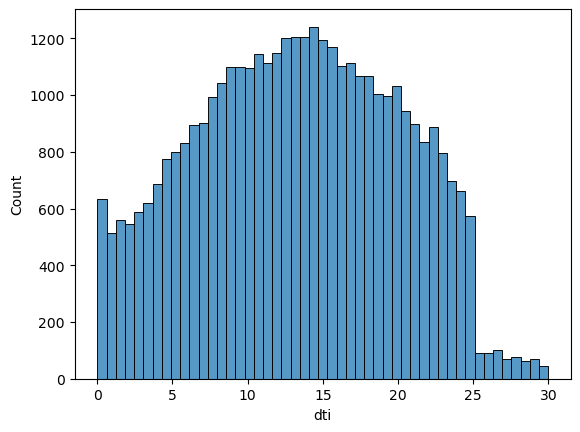

In [411]:
#plotting histogram for all numeric variables
for cols in numeric_cols1:
    sns.histplot(x=loan[str(cols)])
    plt.show()


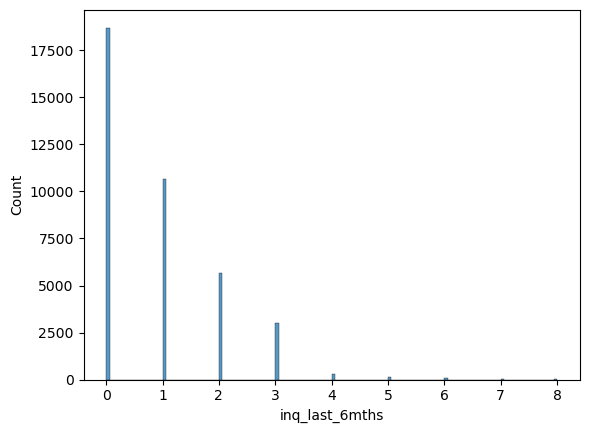

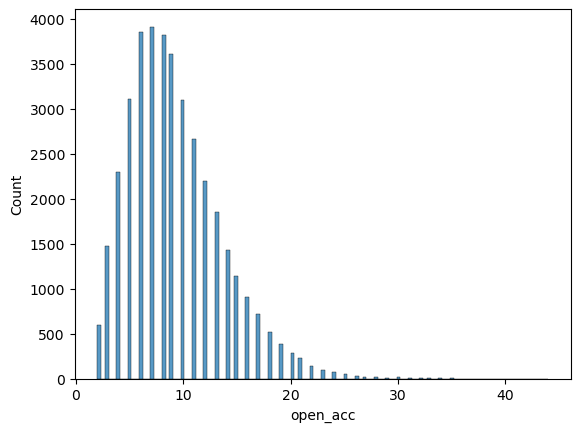

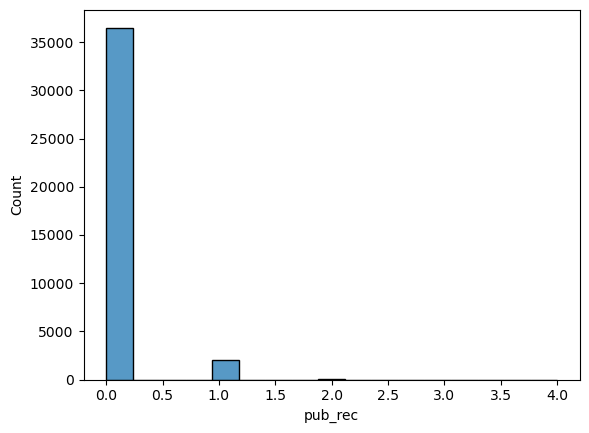

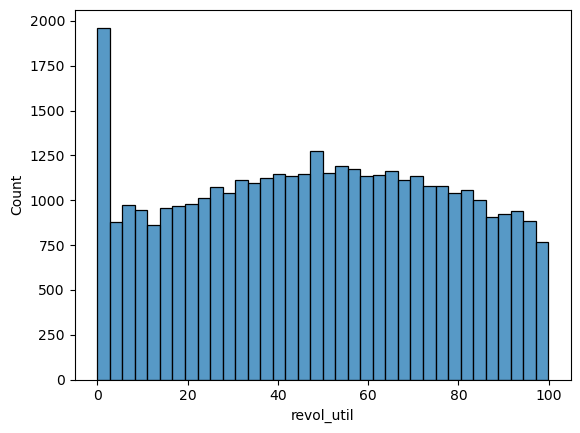

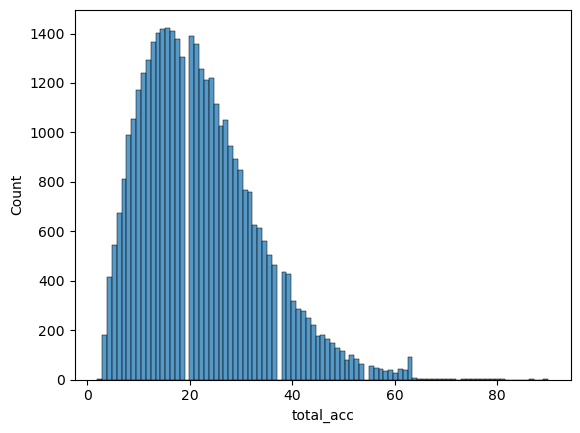

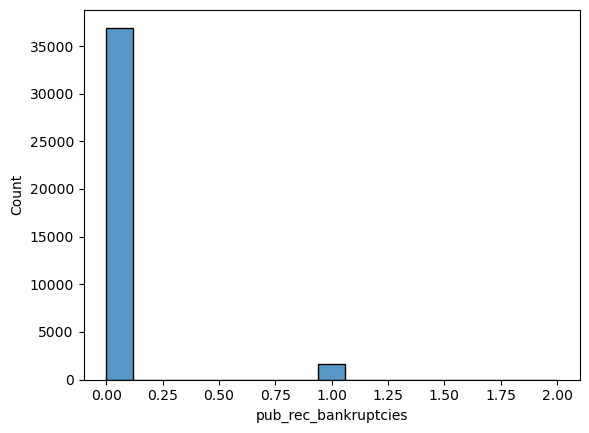

In [412]:
for cols in numeric_cols2:
    sns.histplot(x=loan[str(cols)])
    plt.show()


In [413]:
# we see outlier in annual income is quite significant on the box plot as well as histplot.
# let us analyse it 
loan[numeric_cols1].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000


In [414]:
# let us check  few percentile on annual income
print('80 percentile', loan['annual_inc'].quantile(0.8))
print('90 percentile', loan['annual_inc'].quantile(0.9))
print('95 percentile', loan['annual_inc'].quantile(0.95))
print('100 percentile', loan['annual_inc'].quantile(1))

80 percentile 90000.0
90 percentile 115000.0
95 percentile 140004.0
100 percentile 6000000.0


In [415]:
# we see huge difference between 95 & 100 quantile, let us check futher
print('98 percentile', loan['annual_inc'].quantile(0.98))
print('99 percentile', loan['annual_inc'].quantile(0.99))
print('100 percentile', loan['annual_inc'].quantile(1))

98 percentile 187000.0
99 percentile 234143.99999999878
100 percentile 6000000.0


## Treating outlier in Annual Income
### we see that there is huge gap between 99 and 100 quantile 

In [416]:
loan.shape

(38577, 24)

In [417]:
loan = loan[loan['annual_inc'] <= loan['annual_inc'].quantile(0.99)]

In [418]:
loan.shape

(38191, 24)

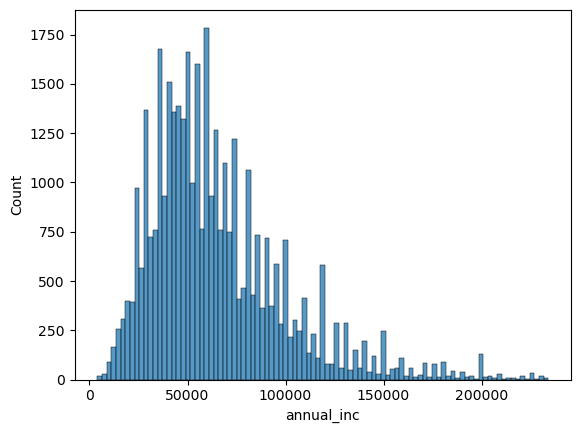

In [420]:
sns.histplot(x=loan['annual_inc'])
plt.show()

In [ ]:
# now outliers in annual income has been removed and 386 records were dropped.

### Observation from Numeric data distribution plots(box plot and histogram)
* Loan_amnt, funded_amnt & funded_amnt_inv are having almost similar plot, the range is 4000 to 10000 approx
* Most of the applicants/customers have interest rate between 10 to 16 approx. After 16 int rate, number is reducing 
* It is noticed that people prefer installment amount lesser than 400.
* We observe that dti has highest value of 15 approx otherwise it looks normally distributed.
* Most of the customers have annual income in range of 250000 to 750000


In [28]:
loan.columns 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [29]:
## Univariate analysis

In [30]:
loan['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

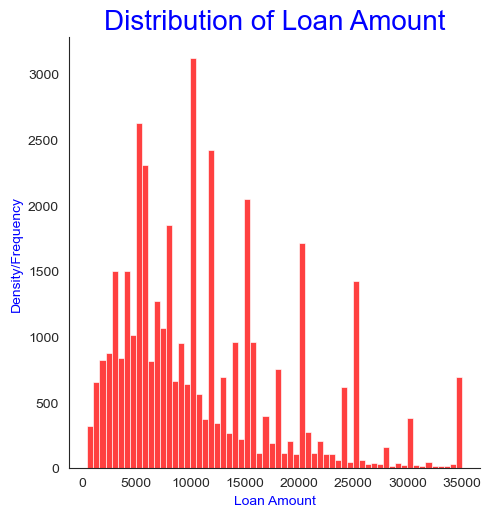

In [31]:
sns.set_style('white')
sns.displot(loan['loan_amnt'],color = 'r')

# labelling axes
plt.xlabel('Loan Amount',fontdict={'fontsize' : 10,'fontweight' : 10, 'color': 'Blue'})
plt.ylabel('Density/Frequency',fontdict={'fontsize' : 10,'fontweight' : 10, 'color': 'Blue'})
plt.title('Distribution of Loan Amount',fontdict={'fontsize' : 20,'fontweight' : 10, 'color': 'Blue'})
plt.show()

In [32]:
loan['loan_amnt'].value_counts().reset_index(name='Count')

,loan_amnt,Count
0,10000,2833
1,12000,2334
2,5000,2051
3,6000,1908
4,15000,1895
...,...,...
880,22875,1
881,8175,1
882,19475,1
883,21225,1


In [33]:
loan.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv']]

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000,5000,4975.0
1,2500,2500,2500.0
2,2400,2400,2400.0
3,10000,10000,10000.0
4,3000,3000,3000.0
...,...,...,...
39712,2500,2500,1075.0
39713,8500,8500,875.0
39714,5000,5000,1325.0
39715,5000,5000,650.0


In [34]:
loan['loan_amount_approved'] = round((loan['funded_amnt']/loan['loan_amnt']*100),2)

In [35]:
loan['loan_amount_approved']

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
39712    100.0
39713    100.0
39714    100.0
39715    100.0
39716    100.0
Name: loan_amount_approved, Length: 39717, dtype: float64

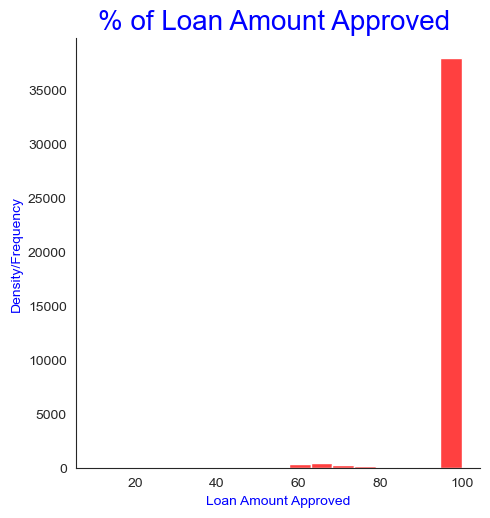

In [36]:
sns.set_style('white')
sns.displot(loan['loan_amount_approved'],color = 'r')

# labelling axes
plt.xlabel('Loan Amount Approved',fontdict={'fontsize' : 10,'fontweight' : 10, 'color': 'Blue'})
plt.ylabel('Density/Frequency',fontdict={'fontsize' : 10,'fontweight' : 10, 'color': 'Blue'})
plt.title('% of Loan Amount Approved ',fontdict={'fontsize' : 20,'fontweight' : 10, 'color': 'Blue'})
plt.show()

In [37]:
loan['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [38]:
# Binning continous variable  to categorical variables 
# low-loan-amnt: <5501 , mid-loan-amnt 5501-15000 & high-loan-amnt: 15000>
def loan_amount_category(amount):
    if amount < 5501 :
        return('low-loan-amnt')
    elif amount < 15001:
        return('mid-loan-amnt')
    else: 
        return('hight-loan-amnt')

In [39]:
loan['loan_amount_category'] = loan['loan_amnt'].apply(lambda x : loan_amount_category(x) )

In [40]:
loan['loan_amount_category'].value_counts()

loan_amount_category
mid-loan-amnt      20380
low-loan-amnt      10134
hight-loan-amnt     9203
Name: count, dtype: int64

In [41]:
loan['int_rate'].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [42]:
loan['int_rate'] =  loan['int_rate'].apply(lambda x:float(x.split('%')[0]))


In [43]:
loan['int_rate'] 

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [44]:
# Binning continous variable  to categorical variables 

In [45]:
# low-int-rate: 0-7.5 , mid-int-rate: 7.6-13.0 and high-int-rate: 13.0 and higher
def interest_rate_category(rate):
    if rate <= 7.5:
        return('low-int-rate')
    elif rate <= 13.0:
        return('mid-int-rate')
    else:
        return('high-int-rate')

In [46]:
loan['int_rate_category'] = loan['int_rate'].apply(lambda x:interest_rate_category(x))

In [47]:
loan['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

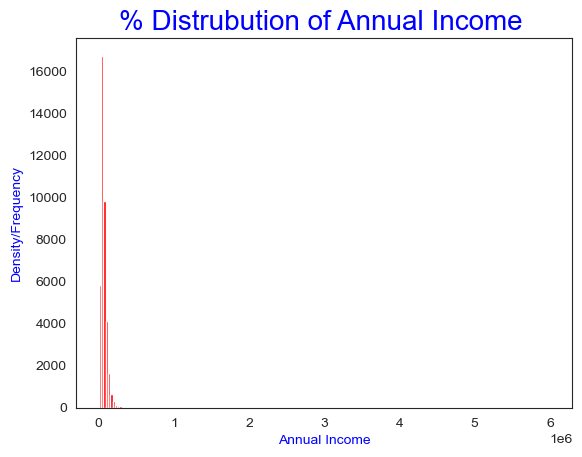

In [48]:
sns.set_style('white')
plt.hist(loan['annual_inc'],color = 'r',bins=200)

# labelling axes
plt.xlabel('Annual Income',fontdict={'fontsize' : 10,'fontweight' : 10, 'color': 'Blue'})
plt.ylabel('Density/Frequency',fontdict={'fontsize' : 10,'fontweight' : 10, 'color': 'Blue'})
plt.title('% Distrubution of Annual Income ',fontdict={'fontsize' : 20,'fontweight' : 10, 'color': 'Blue'})
plt.show()

In [49]:
loan['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [50]:
loan['annual_inc'].median()

59000.0

In [51]:
# low-income: 0-50000 , mid-income: 50001-100000 , high-income: 100001- higher limit

def annual_income_category(income):
    if income < 50001:
        return('low-income')
    elif income < 100001:
        return('mid-income')
    else:
        return('high-income')

In [52]:
loan['annual_inc_category'] = loan['annual_inc'].apply(lambda x:annual_income_category(x))

In [53]:
# Univariate analysis 

In [54]:
def univariate_analysis(input_column):
    print(loan[input_column].value_counts().reset_index(name='count'))

In [55]:
univariate_analysis('term')

         term  count
0   36 months  29096
1   60 months  10621


In [56]:
univariate_analysis('annual_inc_category')

  annual_inc_category  count
0          mid-income  18285
1          low-income  15745
2         high-income   5687


In [57]:
univariate_analysis('int_rate_category')

  int_rate_category  count
0      mid-int-rate  19045
1     high-int-rate  15295
2      low-int-rate   5377


In [58]:
univariate_analysis('purpose')

               purpose  count
0   debt_consolidation  18641
1          credit_card   5130
2                other   3993
3     home_improvement   2976
4       major_purchase   2187
5       small_business   1828
6                  car   1549
7              wedding    947
8              medical    693
9               moving    583
10            vacation    381
11               house    381
12         educational    325
13    renewable_energy    103


In [59]:
univariate_analysis('loan_status')

   loan_status  count
0   Fully Paid  32950
1  Charged Off   5627
2      Current   1140


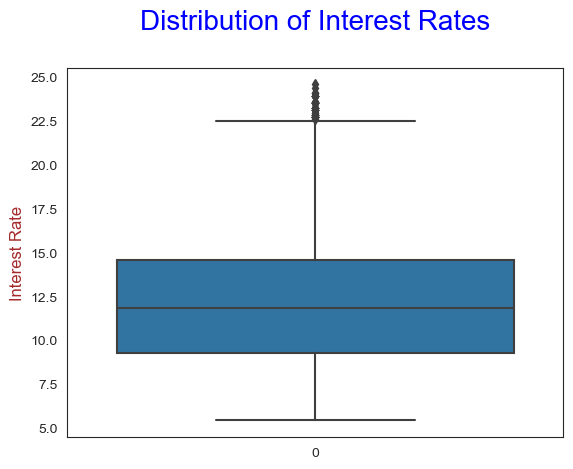

In [60]:
sns.boxplot(loan['int_rate'])
# Adding and formatting title
plt.title("Distribution of Interest Rates\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

# Labeling Axes
plt.ylabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [61]:
loan['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [62]:
loan['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

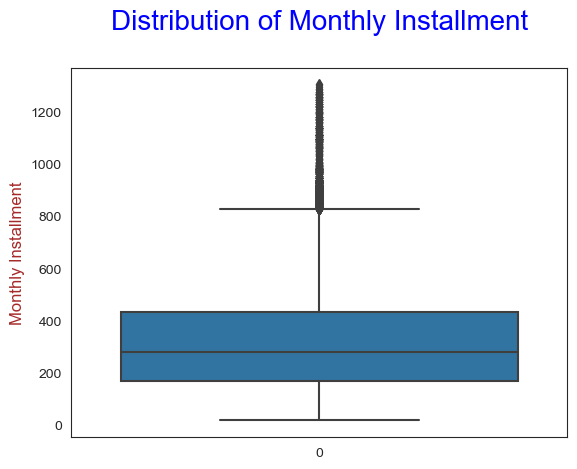

In [63]:
sns.boxplot(loan['installment'])
# Adding and formatting title
plt.title("Distribution of Monthly Installment\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})

# Labeling Axes
plt.ylabel("Monthly Installment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [64]:
univariate_analysis('grade') 

  grade  count
0     B  12020
1     A  10085
2     C   8098
3     D   5307
4     E   2842
5     F   1049
6     G    316


In [141]:
loan['grade'].value_counts().index

Index(['B', 'A', 'C', 'D', 'E', 'F', 'G'], dtype='object', name='grade')

In [155]:
def univariate_visualization(category,xlabel_name,ylabel_name,plot_title):
    sns.countplot(x=loan[str(category)], edgecolor='Orange',color='green',order = loan[str(category)].value_counts().iloc[:].index )
    plt.xticks(rotation='vertical')
    plt.title(str(plot_title), fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'})
    plt.xlabel(str(xlabel_name), fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
    plt.ylabel(str(ylabel_name), fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Blue'})
    plt.show()
    return
#,abs_values = loan[str(category)].value_counts(ascending=False).values    

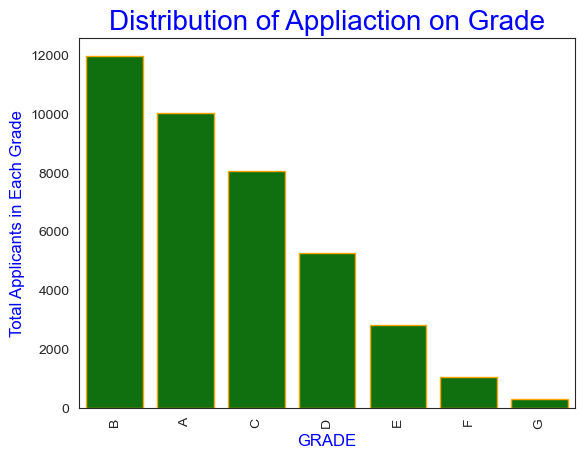

In [156]:
univariate_visualization('grade','GRADE','Total Applicants in Each Grade','Distribution of Appliaction on Grade')

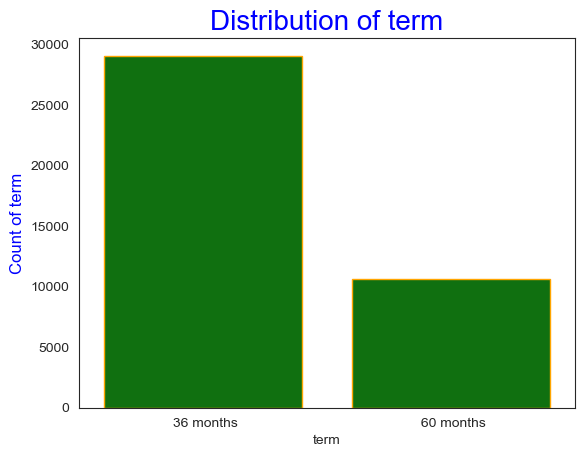

In [67]:
univariate_visualization('term','Count of term','Distribution of term')

In [68]:
loan['emp_title'].value_counts().describe()

count    28820.000000
mean         1.292783
std          2.048202
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        134.000000
Name: count, dtype: float64

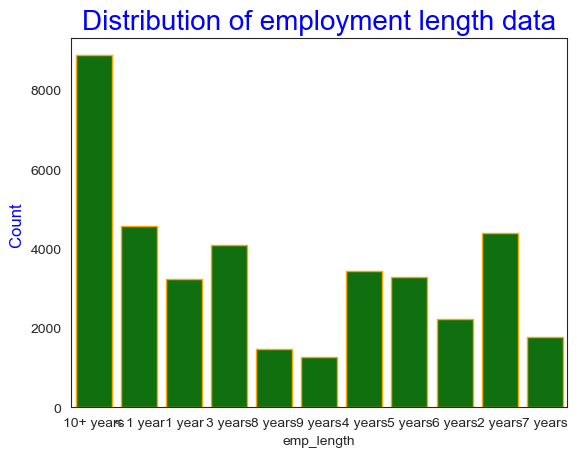

In [69]:
univariate_visualization('emp_length','Count ','Distribution of employment length data')

<Axes: xlabel='emp_length'>

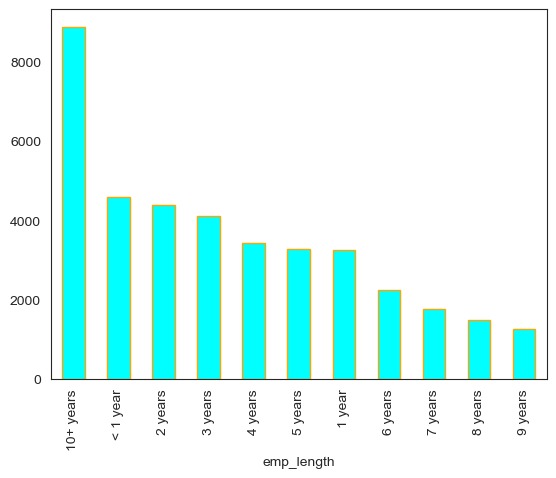

In [70]:
loan["emp_length"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

<font color='Orange'>***Insights***</font>

+ Possible values are between 0 and 10 where 0 denotes less than one year and 10 denotes ten or more years.
+ 1075 null values are present
+ From the graph we can see that people having 10+ year experience are majority of applicants of the loan

In [79]:
# emp_length field contains some text like years, years , + and < . 
# Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
# Cleaning the data to have only numeric value  0 to 10
def convert_emp_length_to_numeric():
    loan['emp_length'] = loan['emp_length'].apply(lambda x:x.replace('years',''))
    loan['emp_length'] = loan['emp_length'].apply(lambda x:x.replace('year',''))
    loan['emp_length'] = loan['emp_length'].apply(lambda x:x.replace('< 1','0'))
    loan['emp_length'] = loan['emp_length'].apply(lambda x:x.replace('10+','10'))
#    loan['emp_length'] = loan['emp_length'].astype('int')
    return



In [80]:
convert_emp_length_to_numeric()

In [82]:
loan['home_ownership'].value_counts()



home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [ ]:
# the home ownership filled during application contains 2 values like NONE and OTHER. These values do not give any insight so dropping them 

In [84]:
loan[(loan['home_ownership'] == 'NONE') | (loan['home_ownership'] == 'OTHER') ].shape


(101, 57)

In [96]:
loan.shape

(39717, 57)

In [98]:
loan = loan[~((loan['home_ownership'] == 'NONE') | (loan['home_ownership'] == 'OTHER')) ] 

In [99]:
loan.shape

(39616, 57)